<a href="https://colab.research.google.com/github/ranobr/MyGitFolder/blob/master/LACovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **USANDO DATABASE DE PAÍSES E DE SUAS RESPECTIVAS POPULAÇÕES ATUALIZADAS**

In [50]:
#import pycountry
import plotly.express as px
import pandas as pd
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
covid_world = pd.read_csv(URL_DATASET)
population_df = pd.read_csv('data/population_by_country_2020.csv')

In [51]:
covid_world.head(5)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [52]:
covid_world.tail(5)

,Date,Country,Confirmed,Recovered,Deaths
24059,2020-05-28,West Bank and Gaza,446,368,3
24060,2020-05-28,Western Sahara,9,6,1
24061,2020-05-28,Yemen,278,11,57
24062,2020-05-28,Zambia,1057,779,7
24063,2020-05-28,Zimbabwe,149,28,4


In [53]:
population_df = population_df.rename(columns={'Country (or dependency)':'Country', 'Population (2020)': 'Population'})
population_df.head()

,Country,Population,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


## Agregando população ao dataset covid-19 e dividindo por 1 Milhão

In [54]:
covid_world = covid_world.merge(population_df[['Country', 'Population']], on='Country')
covid_world['Population'] = covid_world['Population']/1000000
covid_world.sort_values(by='Date').head()

,Date,Country,Confirmed,Recovered,Deaths,Population
0,2020-01-22,Afghanistan,0,0,0,38.742911
4096,2020-01-22,Central African Republic,0,0,0,4.812256
18048,2020-01-22,Slovakia,0,0,0,5.459116
3968,2020-01-22,Canada,0,0,0,37.674770
18176,2020-01-22,Slovenia,0,0,0,2.078881


In [58]:
country_list = ['Brazil', 'Argentina', 'Venezuela', 'Paraguay', 'Uruguay', 
                'Mexico', 'Chile', 'Bolivia', 'Peru', 'Ecuador', 'Colombia',
                'Cuba', 'US', 'Italy', 'Sweden']
filtered_countries = covid_world[covid_world['Country'].isin(country_list)]

In [59]:
filtered_countries['deaths_per_milion'] = filtered_countries['Deaths']/filtered_countries['Population']

/home/guilherme/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



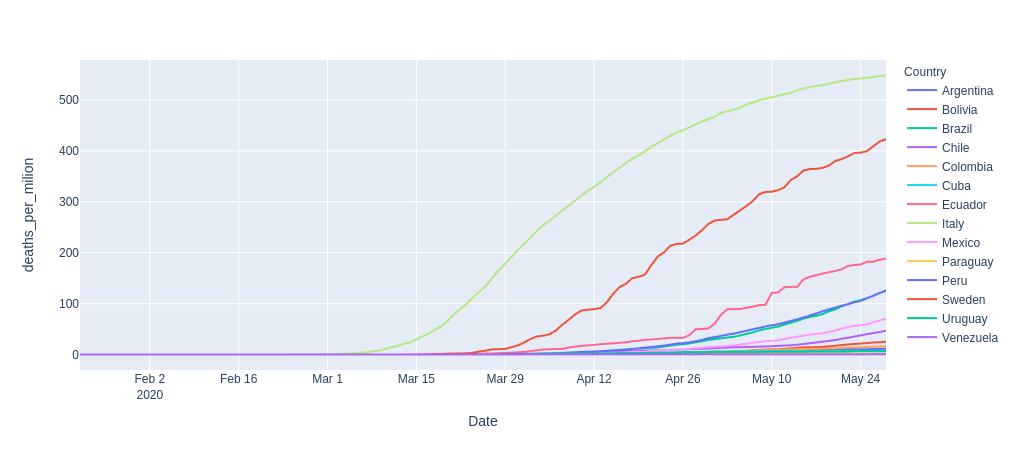

In [60]:
fig = px.line(filtered_countries, x="Date", y="deaths_per_milion", color='Country')
fig.show()

### AMÉRICA LATINA e alguns outros países importantes

In [ ]:
country = []
pop = []
country.append('Brazil')
pop.append(212.559417)
country.append('Argentina')
pop.append(45.195774)
country.append('Venezuela')
pop.append(28.435940)
country.append('Paraguay')
pop.append(7.132538)
country.append('Uruguay')
pop.append(3.473730)
country.append('Mexico')
pop.append(128.932753)
country.append('Chile')
pop.append(19.116201)
country.append('Bolivia')
pop.append(11.673021)
country.append('Peru')
pop.append(32.971854)
country.append('Ecuador')
pop.append(17.643054)
country.append('Colombia')
pop.append(50.882891)
#country.append('Suriname')
#pop.append(0.586632)
country.append('Cuba')
pop.append(11.326616)
#country.append('Haiti')
#pop.append(11.402528)


#references outside Latin America
#country.append('France')
#pop.append(65.273511)
country.append('US')
pop.append(331.002651)
#country.append('Canada')
#pop.append(37.742154)
country.append('Italy')
pop.append(60.461826)
country.append('Sweden')
pop.append(10.099265)
#country.append('United Kingdom')
#pop.append(67.886011)


df = []
for i in range(0, len(country)):
  df.append(df1[df1['Country'] == country[i]])
  df[i]['Confirmed'] = df[i]['Confirmed'].div(pop[i])
  df[i]['Deaths'] = df[i]['Deaths'].div(pop[i])
  df[i]['Recovered'] = df[i]['Recovered'].div(pop[i])

for i in range(0, len(country)):
  print(df[i].tail(3))


             Date Country    Confirmed   Recovered      Deaths
23523  2020-05-26  Brazil  1840.530076  746.111380  115.318344
23711  2020-05-27  Brazil  1937.439450  784.001962  120.427504
23899  2020-05-28  Brazil  2061.719994  835.549902  125.865983
             Date    Country   Confirmed   Recovered     Deaths
23506  2020-05-26  Argentina  292.682232   92.198886  10.708966
23694  2020-05-27  Argentina  308.281035   96.225811  11.062981
23882  2020-05-28  Argentina  325.295900  102.155569  11.239989
             Date    Country  Confirmed  Recovered    Deaths
23681  2020-05-26  Venezuela  42.586952  10.620363  0.386834
23869  2020-05-27  Venezuela  43.782622  10.620363  0.386834
24057  2020-05-28  Venezuela  46.595963  10.620363  0.386834
             Date   Country   Confirmed  Recovered    Deaths
23633  2020-05-26  Paraguay  122.957634  53.557373  1.542228
23821  2020-05-27  Paraguay  123.939052  54.959399  1.542228
24009  2020-05-28  Paraguay  126.182293  56.361424  1.542228
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
saveFigs = 1

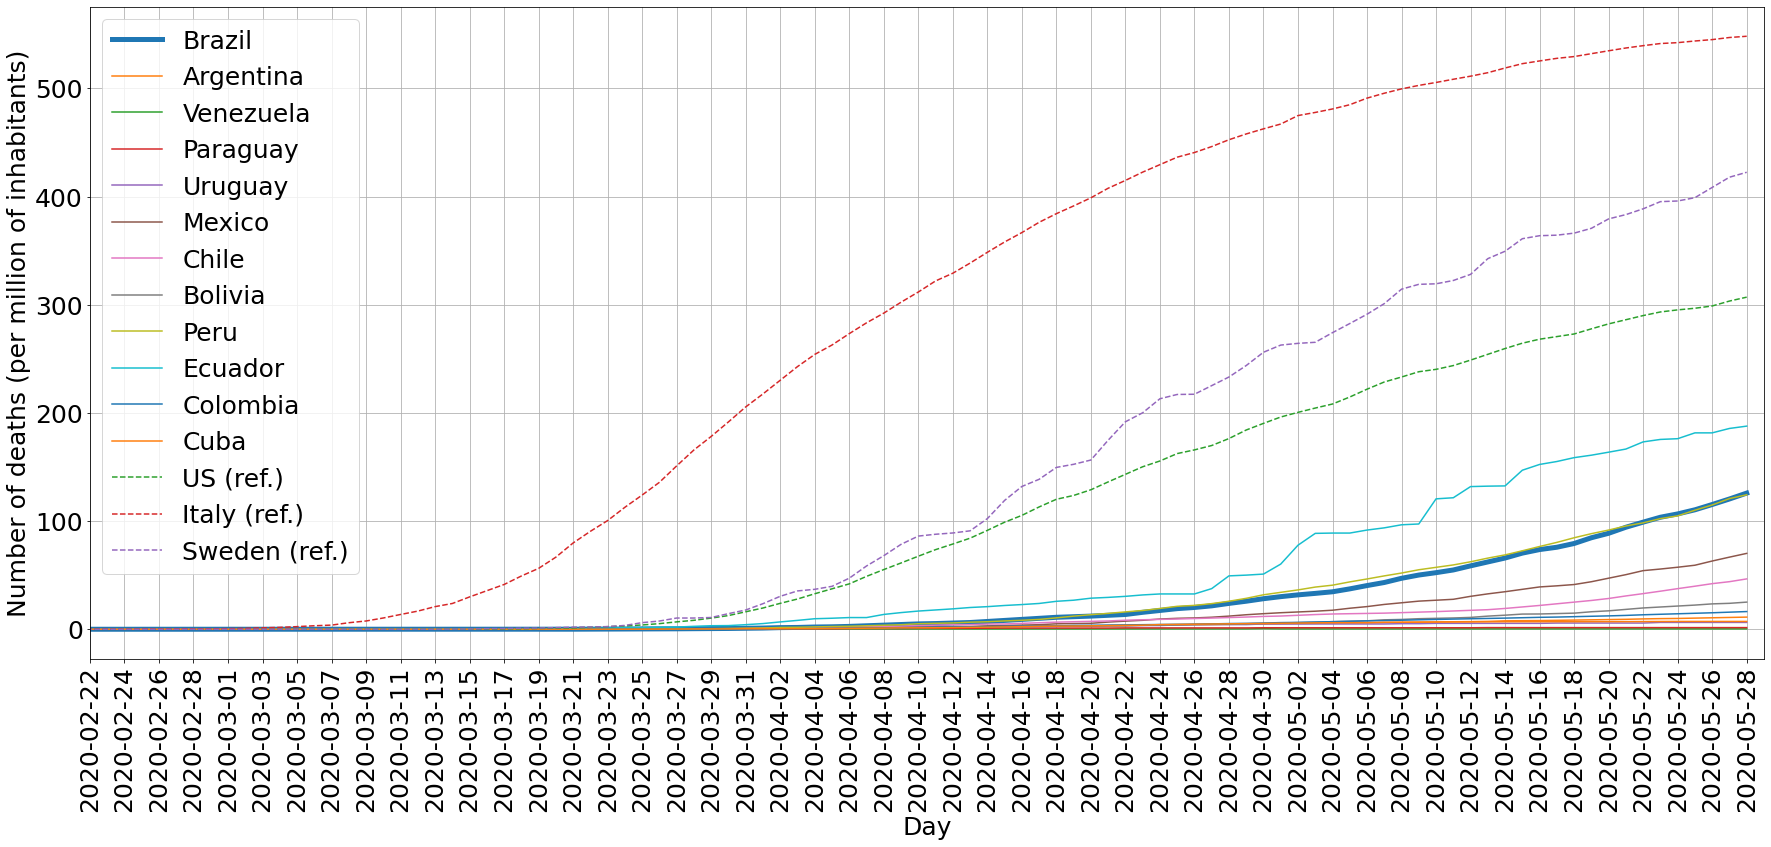

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 25

plt.rcParams["figure.figsize"]=30,12  # Remove if not on Jupyter

for i in range(0,len(country)):
  if country[i] == 'Brazil':
    plt.plot(df[i]['Date'], df[i]['Deaths'], linewidth=5, label=country[i])
  elif country[i] == 'Italy' or country[i] == 'US' or country[i] == 'Canada' or country[i] == 'Sweden' or country[i] == 'United Kingdom':
    plt.plot(df[i]['Date'], df[i]['Deaths'], linestyle='--', label=country[i]+' (ref.)')
  else:
    plt.plot(df[i]['Date'], df[i]['Deaths'], label=country[i])

#plt.yscale('log')
init = 31
plt.xticks(np.arange(init, len(df[0]['Date'])+1, 2.0))
plt.xlim((init, len(df[0]['Date'])))
plt.xticks(rotation=90)
plt.grid()
plt.legend()

plt.xlabel('Day')
plt.ylabel('Number of deaths (per million of inhabitants)')
plt.savefig('TotalDeaPerDay.png', bbox_inches='tight')
if saveFigs == 1:
  !cp  'TotalDeaPerDay.png' '/content/gdrive/My Drive/MyNotebooks/covid19/latinAmerica'

127


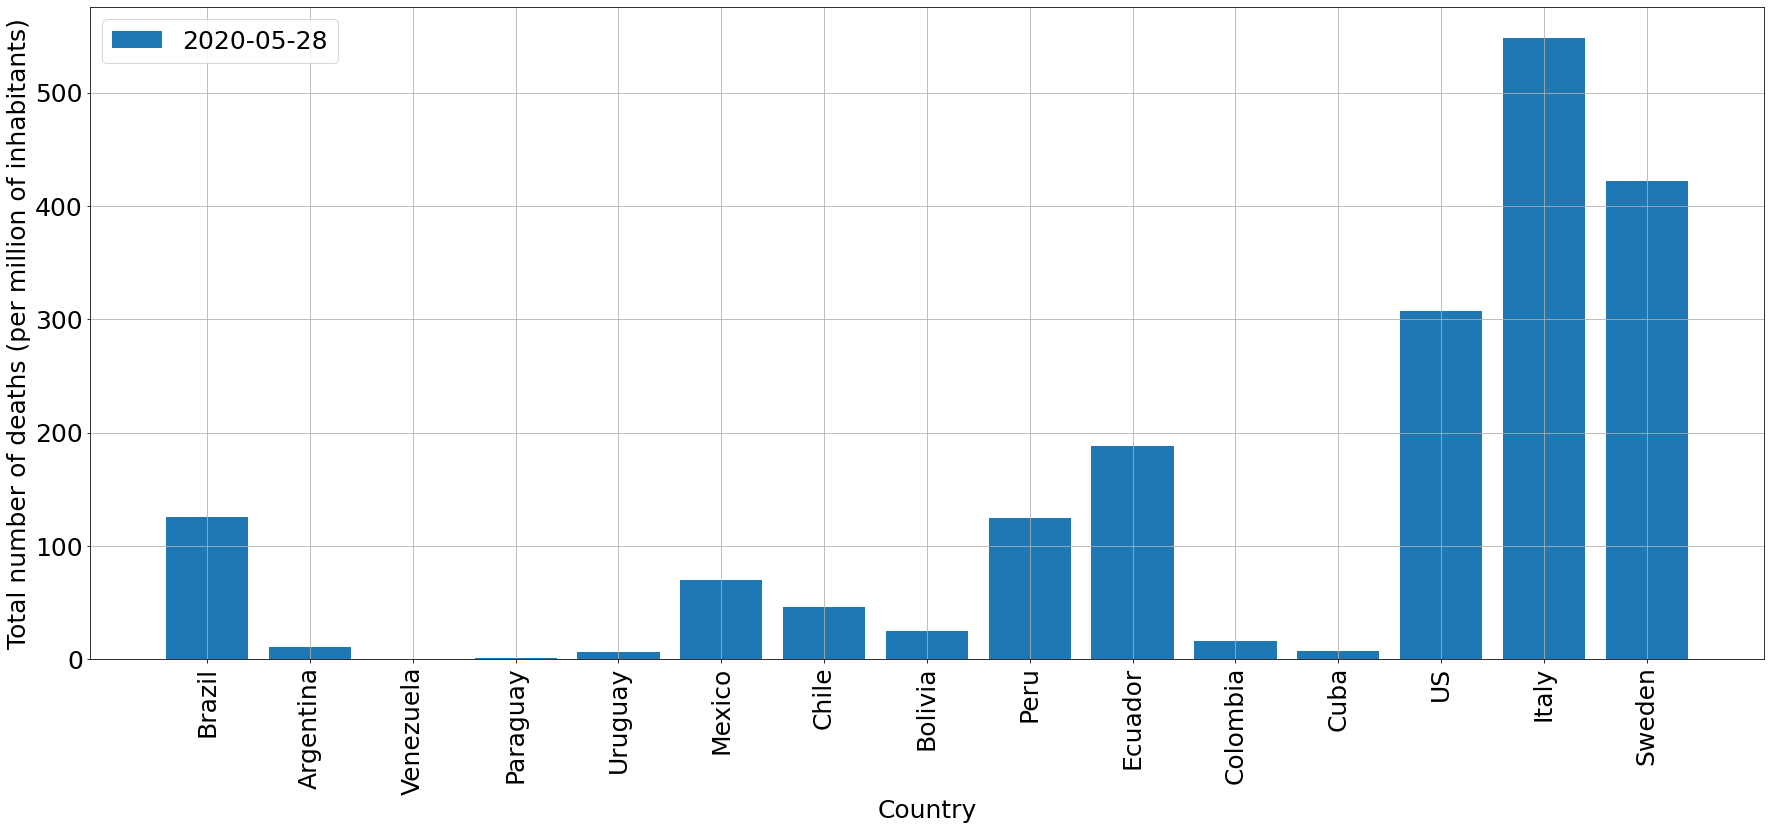

In [ ]:

N = len(df[1]['Date'])-1
print(N)
lastDay = []
for i in range(0,len(country)):
  var = df[i]['Deaths']
  lastDay.append(np.array(var)[N])

var = df[0]['Date']
plt.bar(country, lastDay, label = np.array(var)[N])


plt.xlabel('Country')
plt.ylabel('Total number of deaths (per million of inhabitants)')
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.savefig('TotalDea.png', bbox_inches='tight')

if saveFigs == 1:
  !cp  'TotalDea.png' '/content/gdrive/My Drive/MyNotebooks/covid19/latinAmerica'


127


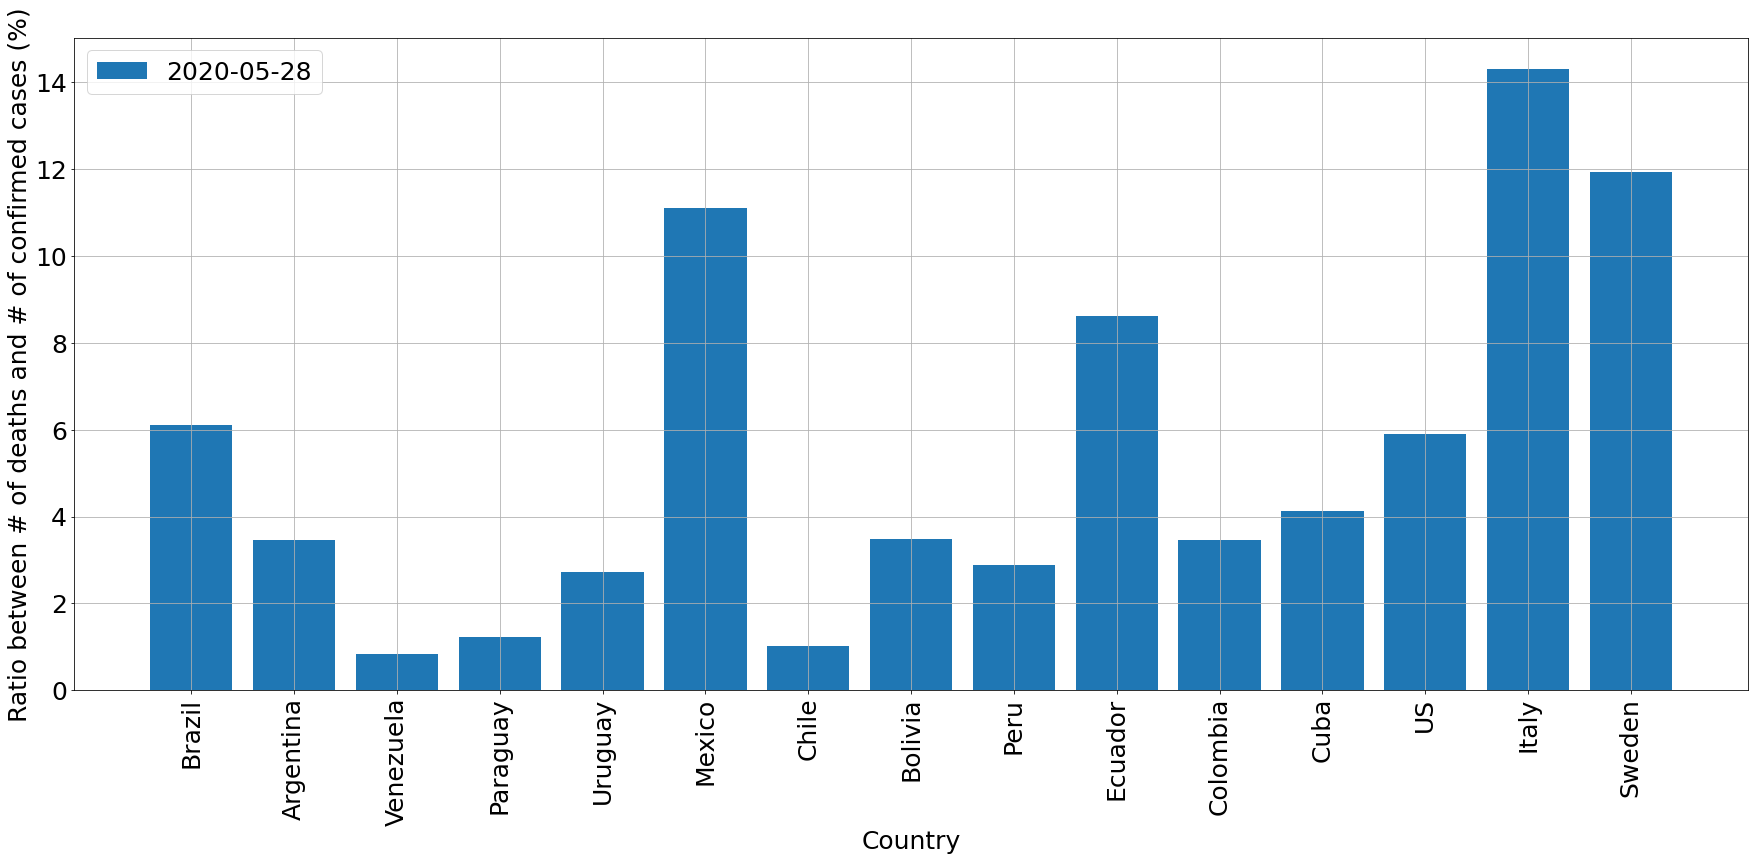

In [ ]:
N = len(df[1]['Date'])-1
print(N)
lastDay = []
for i in range(0,len(country)):
  var1 = df[i]['Deaths']
  var2 = df[i]['Confirmed']
  lastDay.append(np.array(var1)[N]/np.array(var2)[N])

var = df[0]['Date']
plt.bar(country, np.array(lastDay)*100, label = np.array(var)[N])


plt.xlabel('Country')
plt.ylabel('Ratio between # of deaths and # of confirmed cases (%)')
plt.xticks(rotation=90)
#plt.ylabel('Death cases / Confirmed cases ratio (%)')
plt.grid()
plt.legend()
plt.savefig('RatioDeaConf.png', bbox_inches='tight')

if saveFigs == 1:
  !cp  'RatioDeaConf.png' '/content/gdrive/My Drive/MyNotebooks/covid19/latinAmerica'

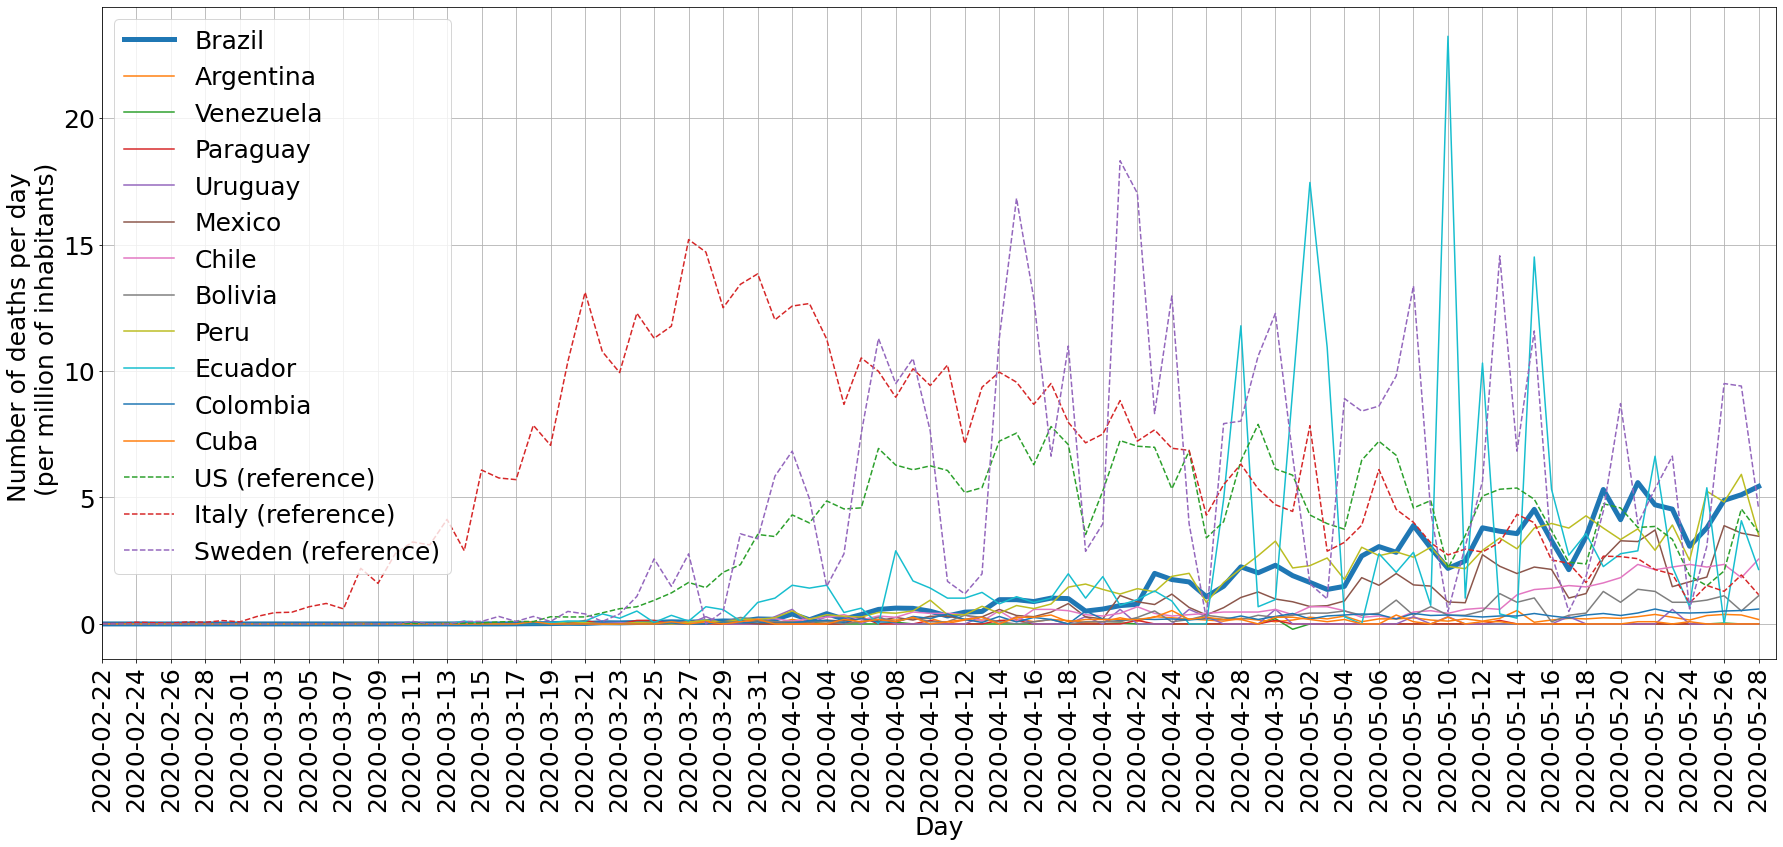

In [ ]:

plt.rcParams["figure.figsize"]=30,12  # Remove if not on Jupyter


for i in range(0,len(country)):
  if country[i] == 'Brazil':
    plt.plot(df[i]['Date'], df[i]['Deaths'].diff(), linewidth=5, label=country[i])
  elif country[i] == 'Italy' or country[i] == 'US' or country[i] == 'Canada' or country[i] == 'Sweden' or country[i] == 'United Kingdom':
    plt.plot(df[i]['Date'], df[i]['Deaths'].diff(), linestyle='--', label=country[i]+' (reference)')
  else:
    plt.plot(df[i]['Date'], df[i]['Deaths'].diff(), label=country[i])


plt.xticks(np.arange(init, len(df[0]['Date'])+1, 2.0))
plt.xlim((init, len(df[0]['Date'])))
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number of deaths per day \n (per million of inhabitants)')
#plt.show()
plt.savefig('DeaPerDay.png', bbox_inches='tight')

if saveFigs == 1:
  !cp  'DeaPerDay.png' '/content/gdrive/My Drive/MyNotebooks/covid19/latinAmerica'

127


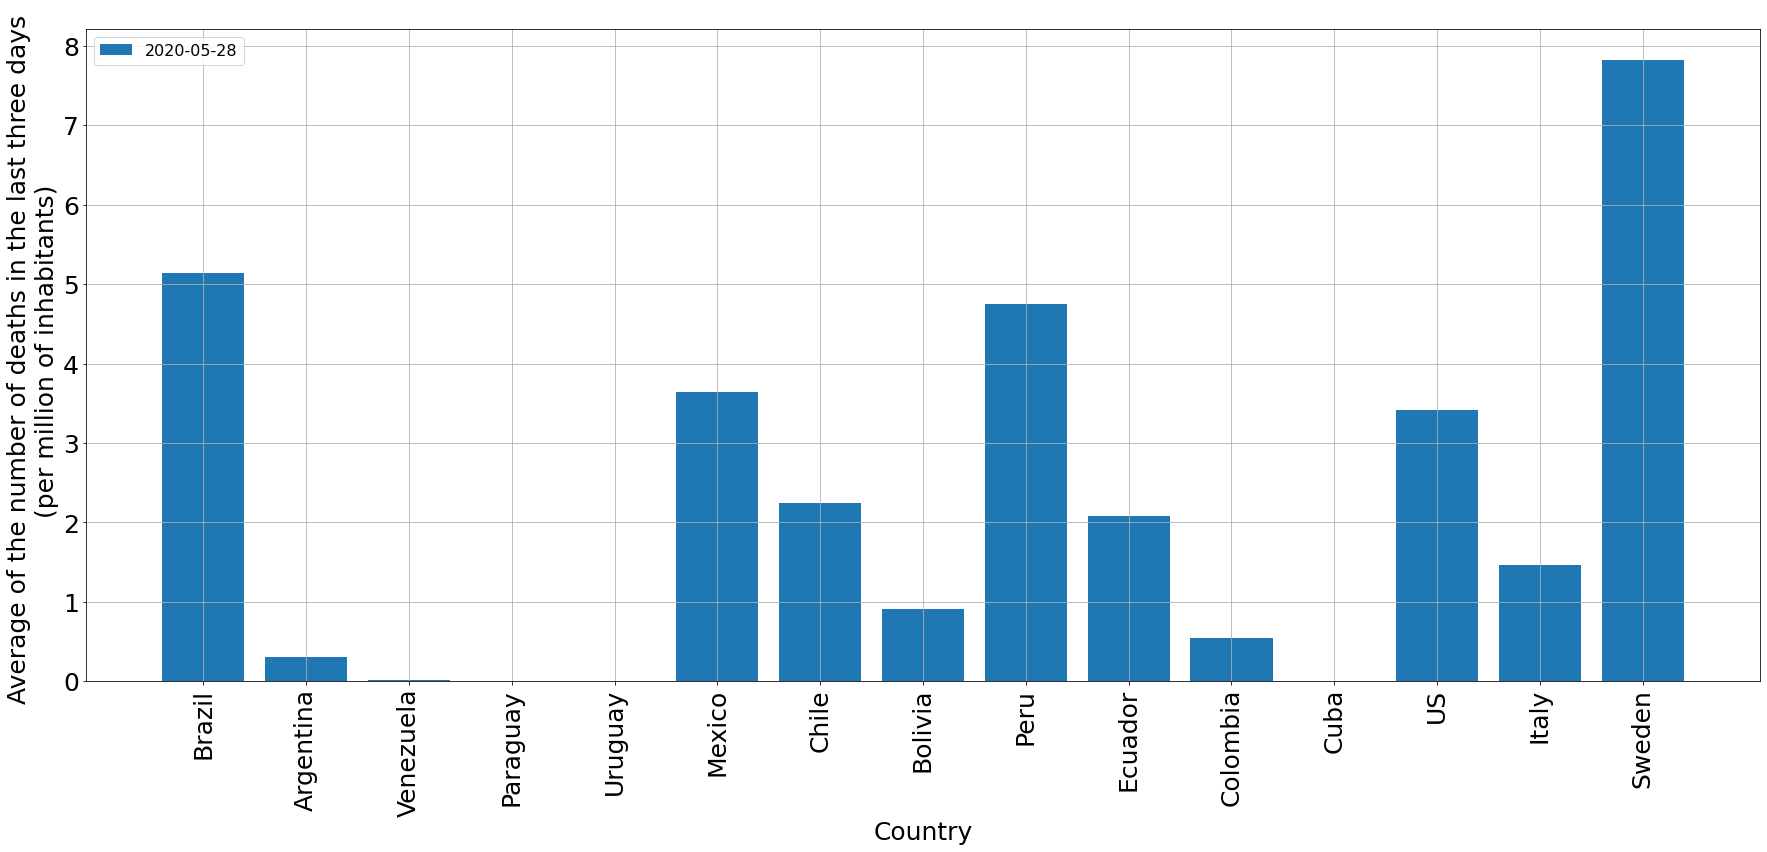

In [ ]:
import numpy as np

N = len(df[1]['Date'])-1
print(N)
lastDay = []
for i in range(0,len(country)):
  var = df[i]['Deaths'].diff()
  lastDay.append((np.array(var)[N]+np.array(var)[N-1]+np.array(var)[N-2])/3)

var = df[0]['Date']
plt.bar(country, lastDay, label = np.array(var)[N])

plt.xlabel('Country')
plt.ylabel('Average of the number of deaths in the last three days \n (per million of inhabitants)')
plt.grid()
plt.xticks(rotation=90)
plt.legend()
plt.savefig('DeaAvgLastDays.png', bbox_inches='tight')

if saveFigs == 1:
  !cp  'DeaAvgLastDays.png' '/content/gdrive/My Drive/MyNotebooks/covid19/latinAmerica'

##SE QUISERMOS PLOTAR EM UM MAPA 
(por enquanto não em uso pois deve-se ainda dividir por núúmero de habitante)

In [ ]:
pip install pycountry

     |████████████████████████████████| 10.0MB 2.8MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=5e4a0f3f2efe2ba9f49b21a82d73f00483b7ef5727d8416d5ad0c3b4ffefb5a8
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry


In [ ]:
import pycountry
import plotly.express as px

#list_countries = df1['Country'].unique().tolist()
list_countries = country
# print(list_countries) 
d_country_code = {}  # To hold the country names and their ISO
for ctry in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(ctry)
        country_code = country_data[0].alpha_3
        d_country_code.update({ctry: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({country: ' '})

# print(d_country_code) # Uncomment to check dictionary  

# create a new column iso_alpha in the df
# and fill it with appropriate iso 3 code
for k, v in d_country_code.items():
    df1.loc[(df1.Country == k), 'iso_alpha'] = v

# print(df1.head)  # Uncomment to confirm that ISO codes added
# ----------- Step 3 ------------
fig = px.choropleth(data_frame = df1,
                    locations= "iso_alpha",
                    color= "Deaths",  # value in column 'Confirmed' determines color
                    scope = 'south america',
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',  #  color scale red, yellow green
                    animation_frame= "Date")

fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

# **USANDO DATABASE DO BRASIL (CIDADES)**

In [ ]:
import pandas as pd
import numpy as np
import io
import requests
import folium
import matplotlib.pyplot as plt
from folium import plugins

In [ ]:
!wget https://data.brasil.io/dataset/covid19/caso_full.csv.gz

brazil_df = pd.read_csv('caso_full.csv.gz', compression='gzip', error_bad_lines=False)

brazil_df

--2020-05-29 14:01:10--  https://data.brasil.io/dataset/covid19/caso_full.csv.gz
Resolving data.brasil.io (data.brasil.io)... 192.99.5.40
Connecting to data.brasil.io (data.brasil.io)|192.99.5.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3249208 (3.1M) [application/gzip]
Saving to: ‘caso_full.csv.gz’

caso_full.csv.gz    100%[===================>]   3.10M  4.60MB/s    in 0.7s    

2020-05-29 14:01:11 (4.60 MB/s) - ‘caso_full.csv.gz’ saved [3249208/3249208]



##ZONA DA MATA##

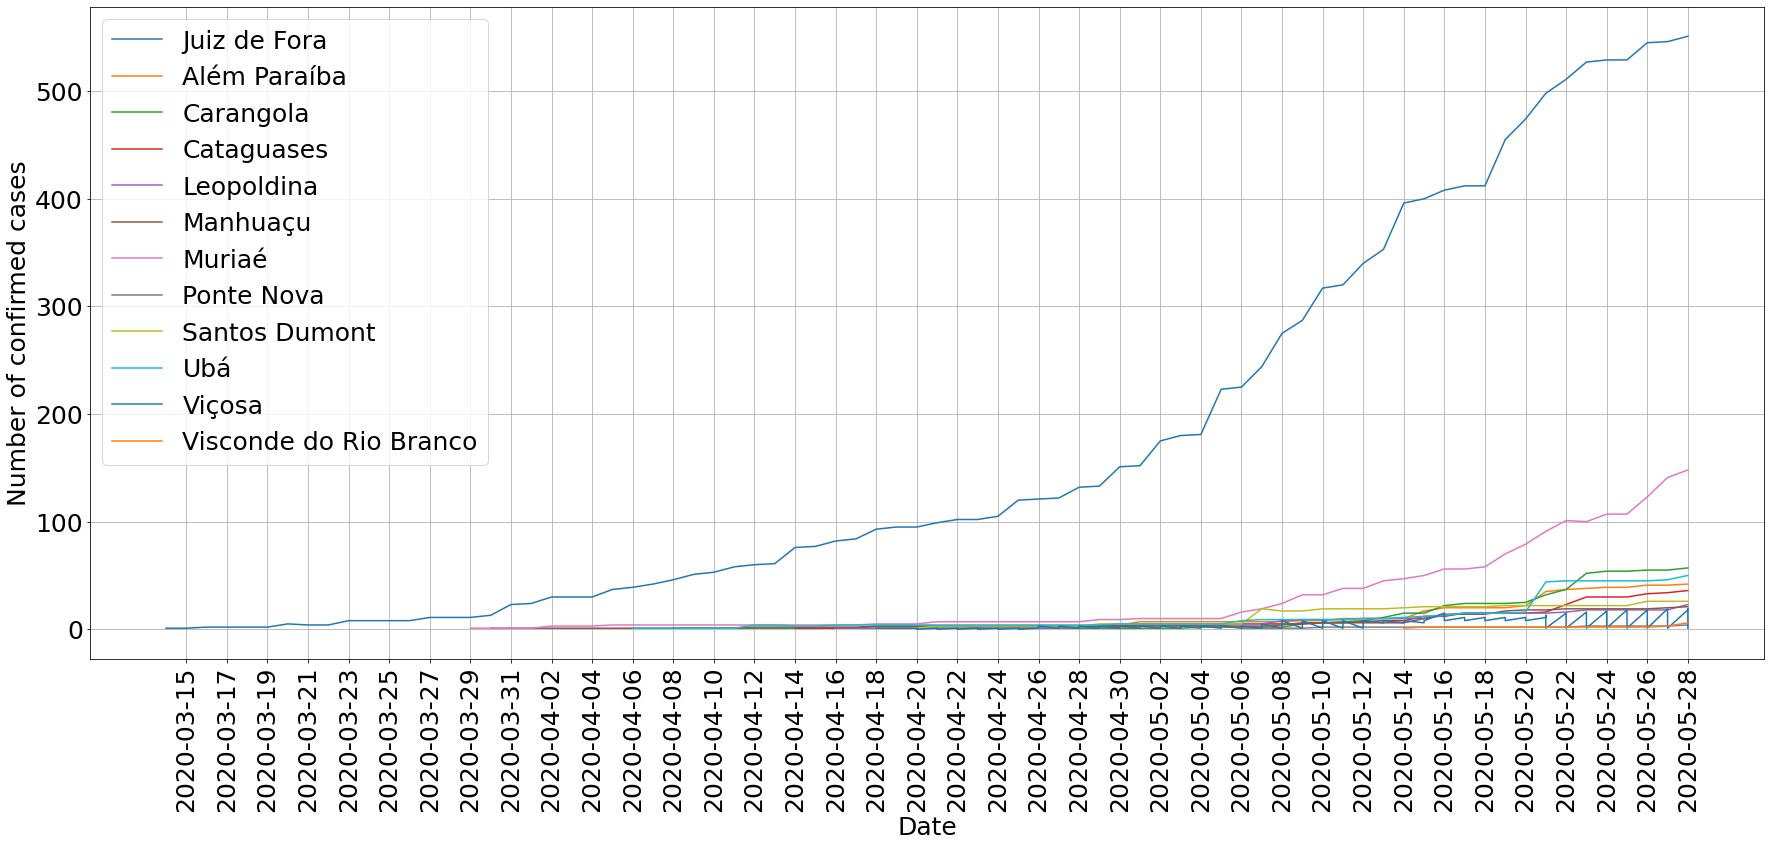

In [ ]:
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 25

plt.rcParams["figure.figsize"]=30,12  # Remove if not on Jupyter

city = []
city.append('Juiz de Fora')
city.append('Além Paraíba')
city.append('Carangola')
city.append('Cataguases')
city.append('Leopoldina')    
city.append('Manhuaçu')  
city.append('Muriaé')  
city.append('Ponte Nova')  
city.append('Santos Dumont')  
city.append('Ubá')  
city.append('Viçosa')  
city.append('Visconde do Rio Branco')  

dfc = []
for i in range(0, len(city)):
  dfc.append(brazil_df[brazil_df['city'] == city[i]])

par = 'last_available_confirmed'
xpar = 'date'

for i in range(0, len(city)):
  plt.plot(np.array(dfc[i][xpar]), np.array(dfc[i][par]))


plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.grid()
plt.xticks(rotation=90)
init = 1
end = len(np.array(dfc[0][xpar]))
plt.xticks(np.arange(init, end+1, 2.0))
plt.legend(city)

if saveFigs == 1:
  plt.savefig('ZMConfirmedCases.png', bbox_inches='tight')
  !cp  'ZMConfirmedCases.png' '/content/gdrive/My Drive/MyNotebooks/covid19/ZonaDaMata'



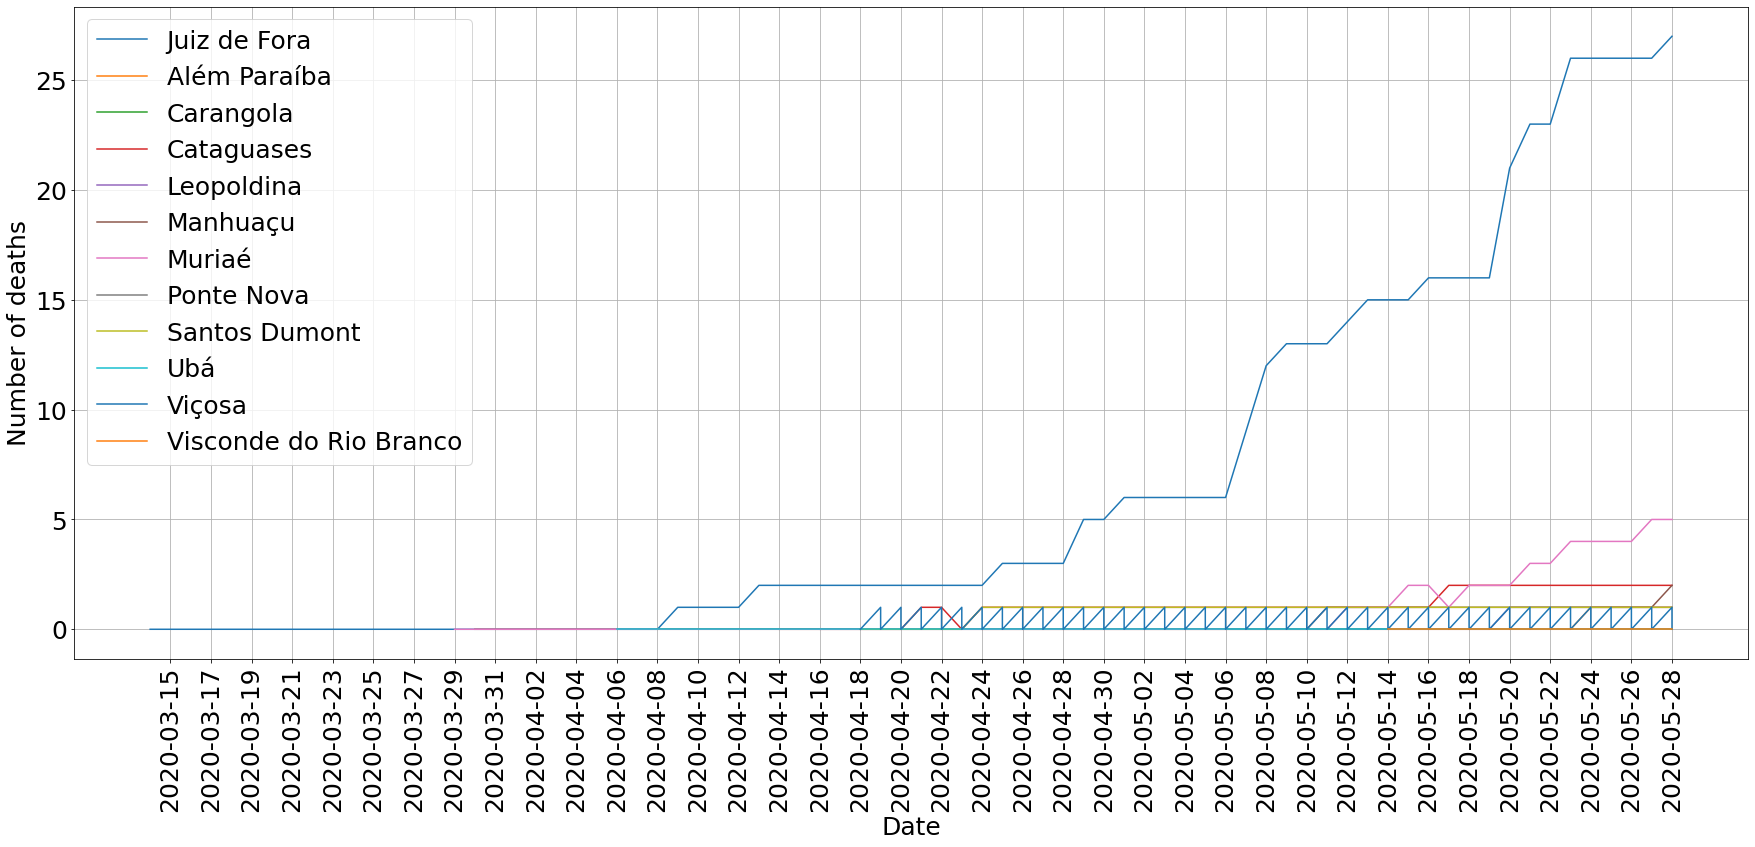

In [ ]:

par = 'new_deaths'
par = 'last_available_deaths'

for i in range(0, len(city)):
  plt.plot(np.array(dfc[i][xpar]), np.array(dfc[i][par]))

plt.xlabel('Date')
plt.ylabel('Number of deaths')
plt.grid()
plt.xticks(rotation=90)
init = 1
end = len(np.array(dfc[0][xpar]))
plt.xticks(np.arange(init, end+1, 2.0))
plt.legend(city)

if saveFigs == 1:
  plt.savefig('ZMDeathNumber.png', bbox_inches='tight')
  !cp  'ZMDeathNumber.png' '/content/gdrive/My Drive/MyNotebooks/covid19/ZonaDaMata'


##REGIÕES E ESTADOS DO BRASIL##

In [ ]:
state = []
norte = ['AM','RR','AP','PA','TO','RO','AC']
state.append(norte)
sudeste = ['SP','RJ','ES','MG']
state.append(sudeste)
sul = ['PR','RS','SC']
state.append(sul)
nordeste = ['MA','PI','CE','RN','PE','PB','SE','AL','BA']
state.append(nordeste)
centrooeste = ['MT','MS','GO']
state.append(centrooeste)
region = ['Norte','Sudeste','Sul','Nordeste','Centro-Oeste']

5

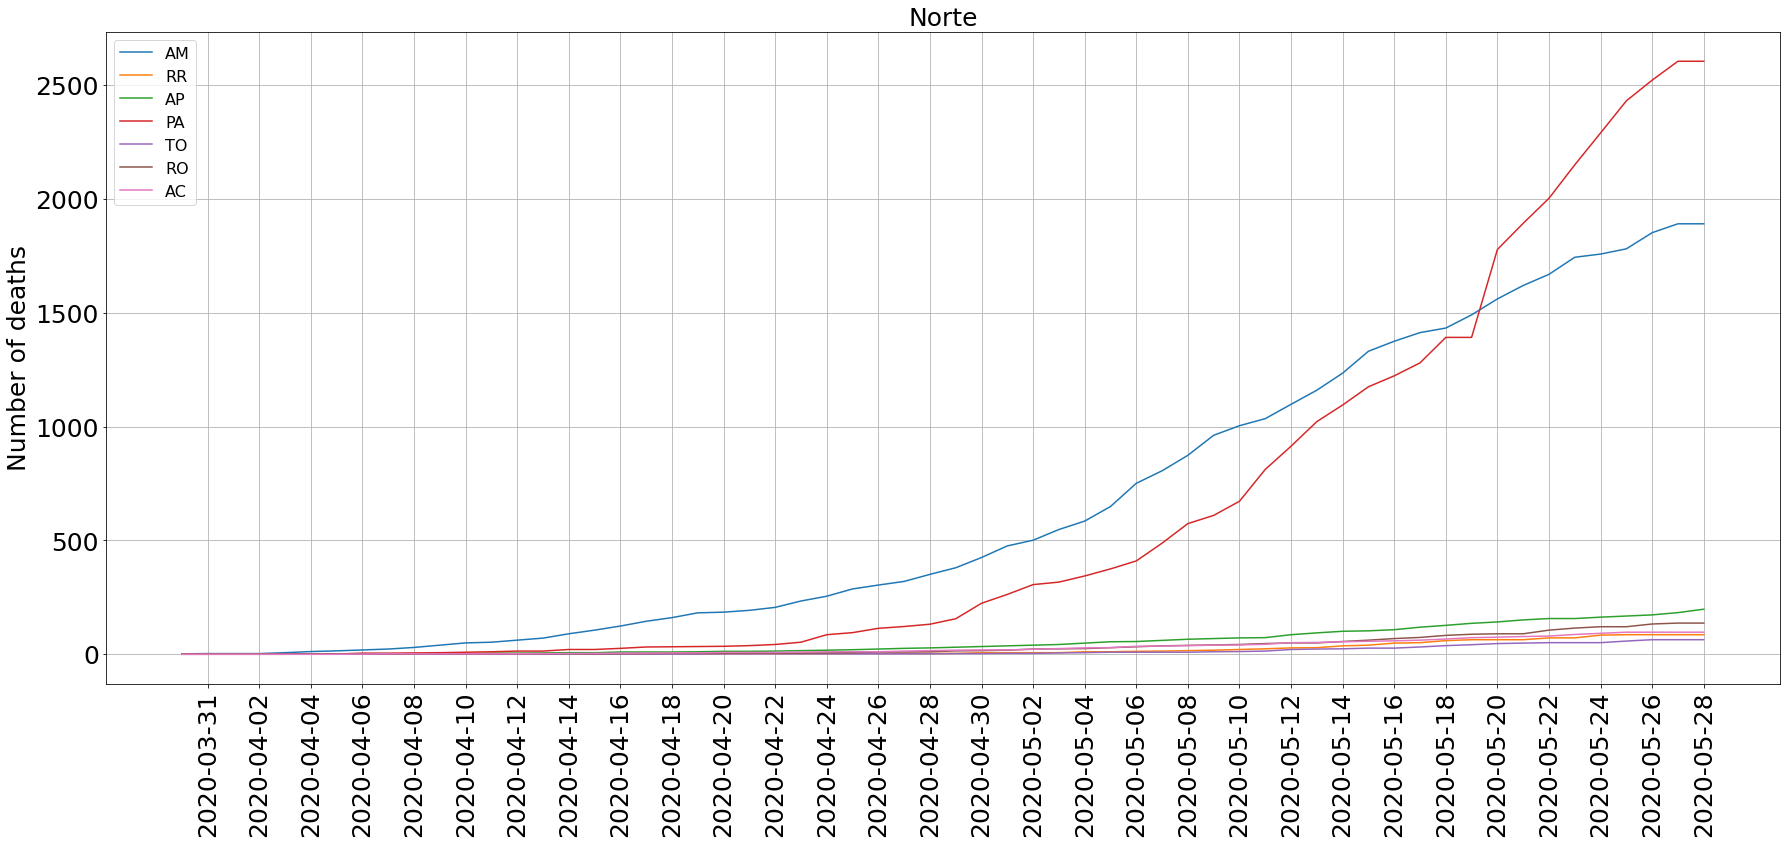

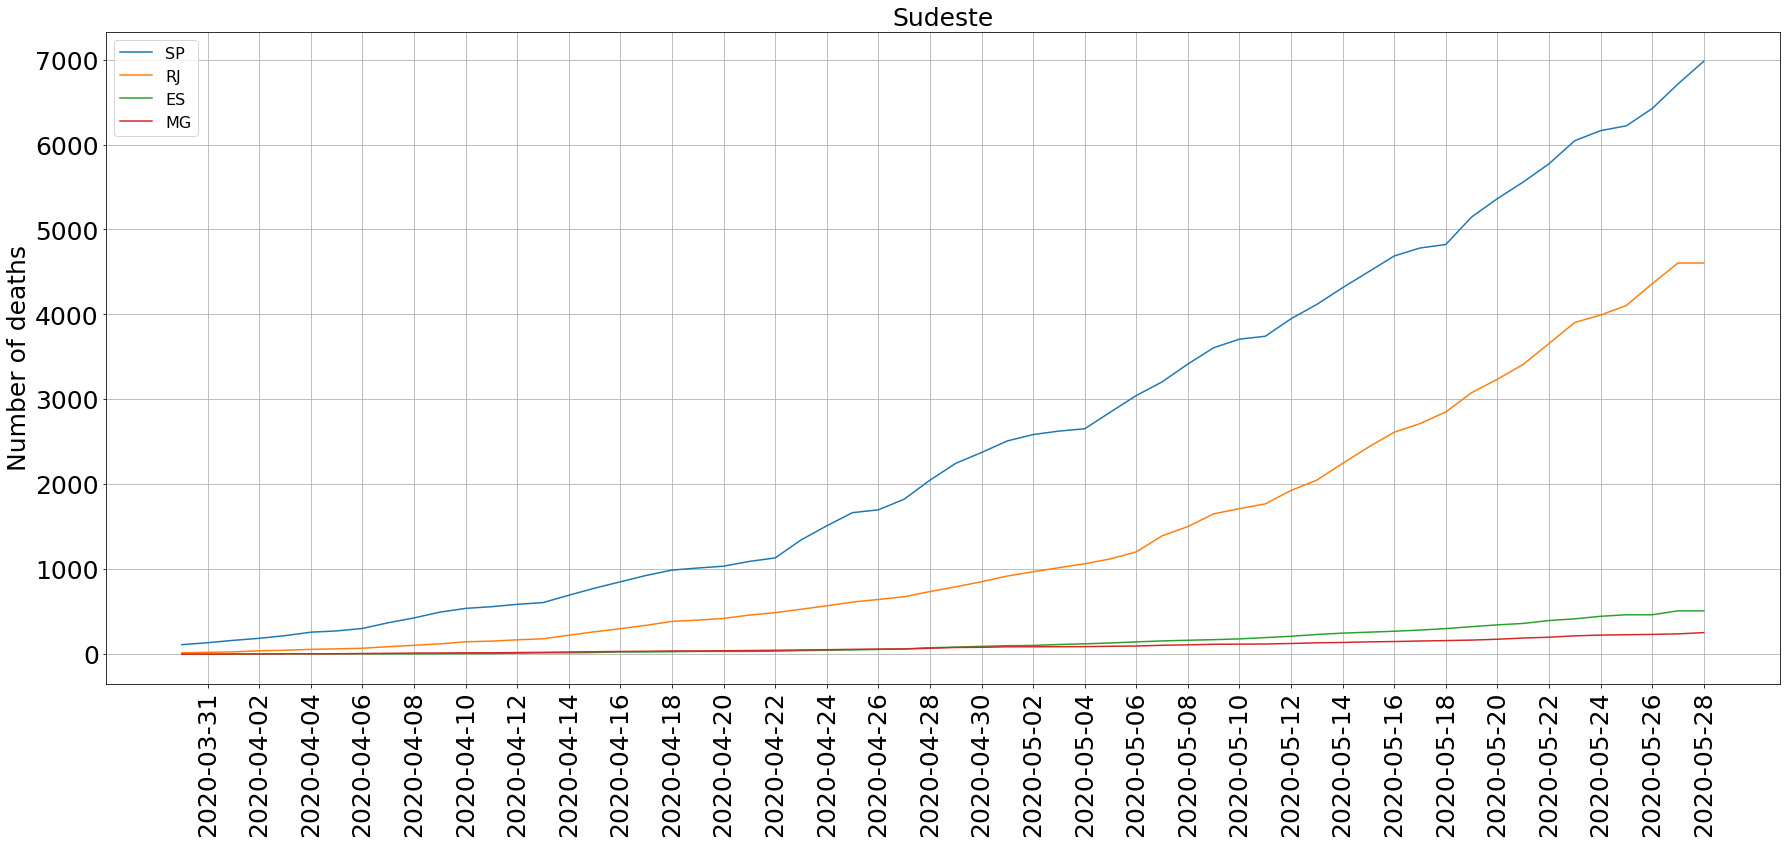

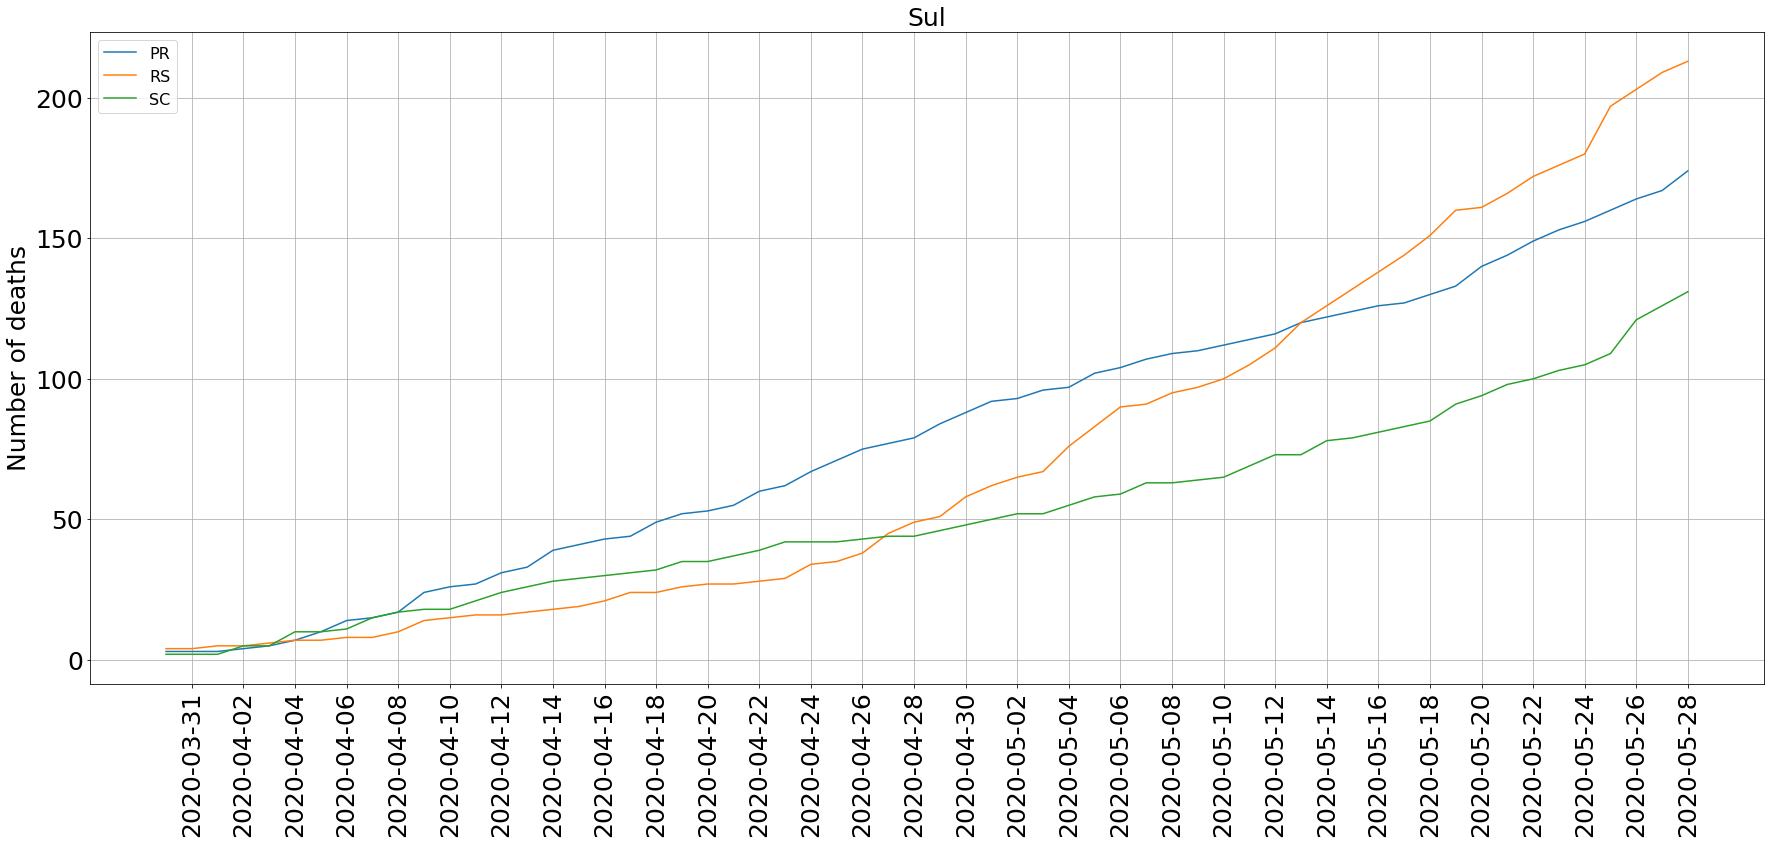

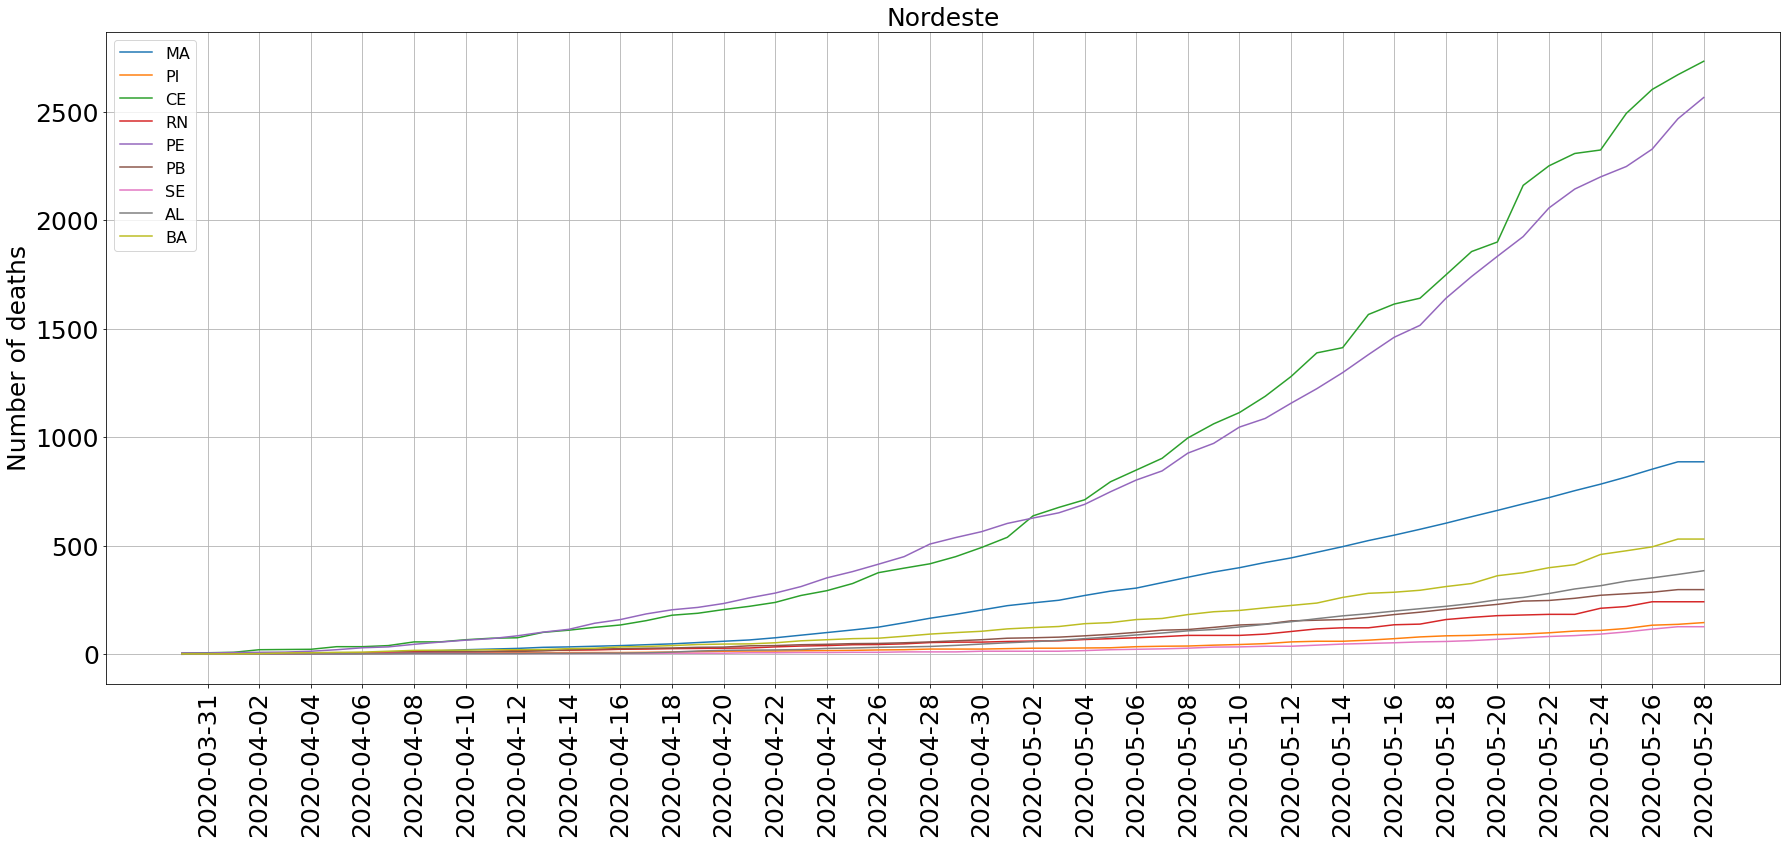

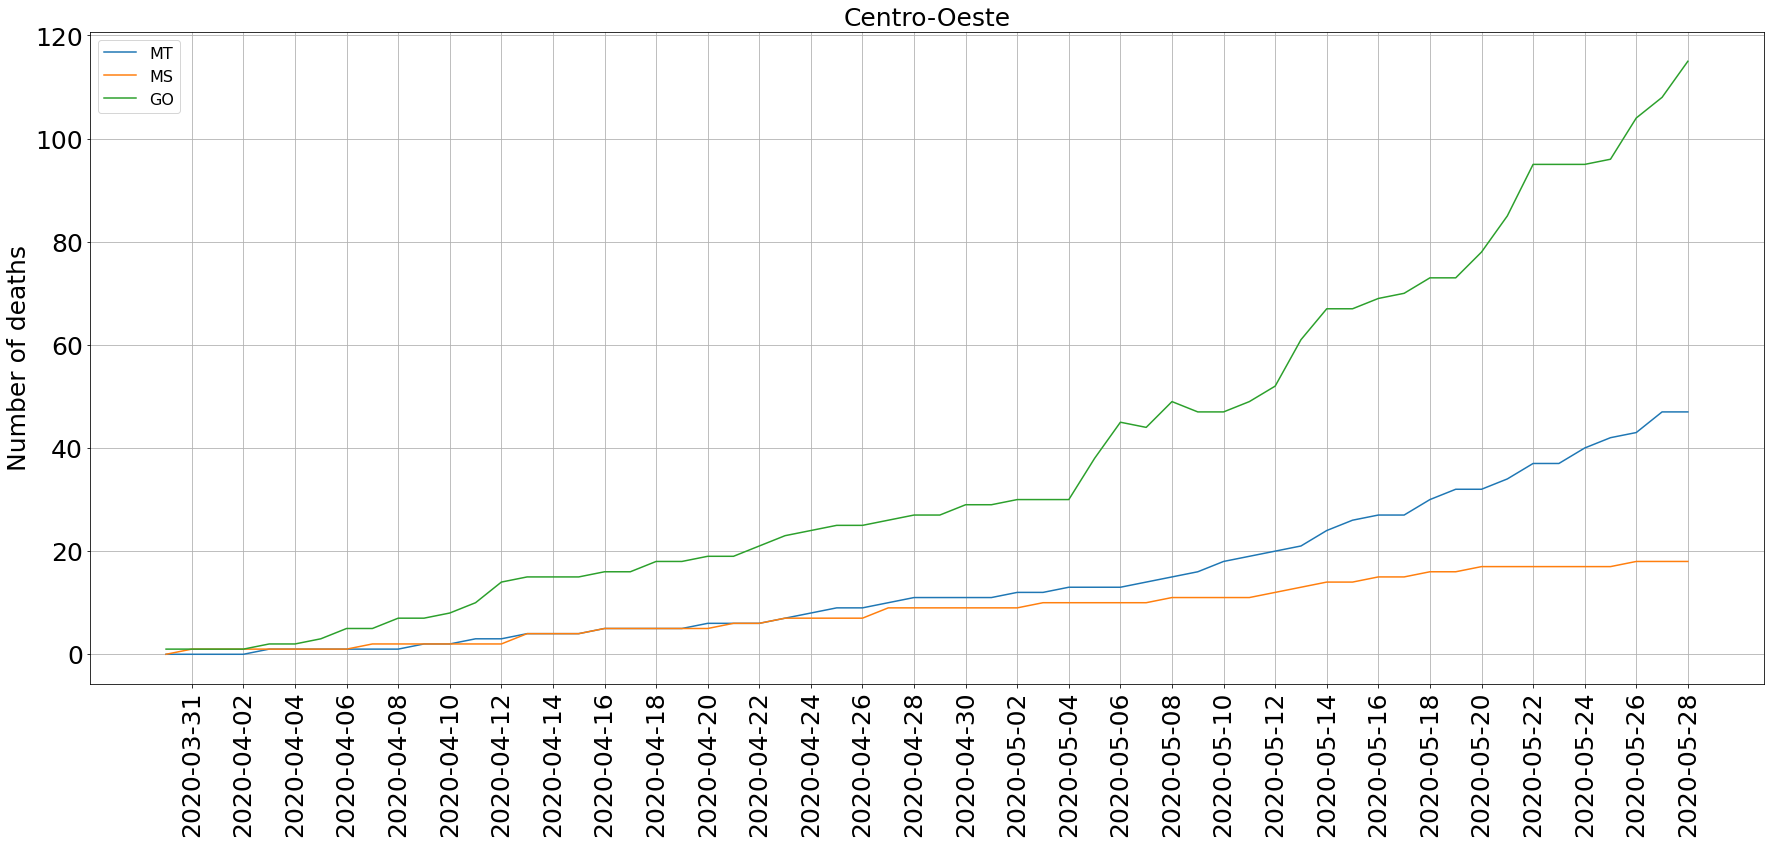

In [ ]:
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 16

plt.rcParams["figure.figsize"]=30,12  # Remove if not on Jupyter

par = 'last_available_deaths'

#dfs = brazil_df[brazil_df['place_type'] == 'state']
#state = np.unique(np.array(dfs['state']))

for k in range(0, len(state)):#regions
  plt.figure()
  for i in range(0, len(state[k])):
    dfs = brazil_df[brazil_df['place_type'] == 'state']
    dfs = dfs[dfs['state'] == state[k][i]]
    string = np.array(dfs['date'])
    string = string[(len(string)-60):len(string)]
    ydata = dfs[par]
    ydata = ydata[(len(ydata)-60):len(ydata)]
    plt.plot(string, ydata)
  #dfs.plot(x ='date', y='last_available_confirmed', kind = 'line')
  plt.title(region[k])
  plt.ylabel('Number of deaths')
#print (np.sum(np.array(jf[par])))
  plt.grid()
  plt.xticks(rotation=90)
  init = 1
  end = len(string)
  plt.xticks(np.arange(init, end+1, 2.0))
  plt.legend(state[k])
  if saveFigs == 1:
    string = region[k]+'.png'
    plt.savefig(string, bbox_inches='tight')
    !cp  {string} '/content/gdrive/My Drive/MyNotebooks/covid19/Regioes'

